In [1]:
using Plots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

### Calculation of cage magnetic field: 

https://aip.scitation.org/doi/pdf/10.1063/5.0010982 

Equation (8)-(16)

In [2]:
ax=0.75;
ay=0.75;
z0=1.1;
μ0=4pi*10^-7;
ρ=1/sqrt(1/ax^2+1/ay^2)
I=1

B0=μ0*I/pi/ρ

7.542472332656509e-7

In [3]:
r1(x,y,z)=sqrt((x+ax)^2+(y+ay)^2+z^2)
r2(x,y,z)=sqrt((x-ax)^2+(y+ay)^2+z^2)
r3(x,y,z)=sqrt((x+ax)^2+(y-ay)^2+z^2)
r4(x,y,z)=sqrt((x-ax)^2+(y-ay)^2+z^2)

Bz(x,y,z) = ρ*B0/4*((x+ax)/r1(x,y,z)/(r1(x,y,z)-y-ay)+(y+ay)/r1(x,y,z)/(r1(x,y,z)-x-ax)-
                   (x-ax)/r2(x,y,z)/(r2(x,y,z)-y-ay)-(y+ay)/r2(x,y,z)/(r2(x,y,z)-x+ax)-
                   (x+ax)/r3(x,y,z)/(r3(x,y,z)-y+ay)-(y-ay)/r3(x,y,z)/(r3(x,y,z)-x-ax)+
                   (x-ax)/r4(x,y,z)/(r4(x,y,z)-y+ay)+(y-ay)/r4(x,y,z)/(r4(x,y,z)-x+ax))

Bx(x,y,z) = -ρ*B0*z/4*(1/r1(x,y,z)/(r1(x,y,z)-y-ay)-1/r2(x,y,z)/(r2(x,y,z)-y-ay)-
                       1/r3(x,y,z)/(r3(x,y,z)-y+ay)+1/r4(x,y,z)/(r4(x,y,z)-y+ay))

By(x,y,z) = -ρ*B0*z/4*(1/r1(x,y,z)/(r1(x,y,z)-x-ax)-1/r2(x,y,z)/(r2(x,y,z)-x+ax)-
                       1/r3(x,y,z)/(r3(x,y,z)-x-ax)+1/r4(x,y,z)/(r4(x,y,z)-x+ax))

Bztot(x,y,z)=Bz(x,y,z)+Bz(x,y,z-z0)
Bytot(x,y,z)=By(x,y,z)+By(x,y,z-z0)
Bxtot(x,y,z)=Bx(x,y,z) +Bx(x,y,z-z0)

Bxtot (generic function with 1 method)

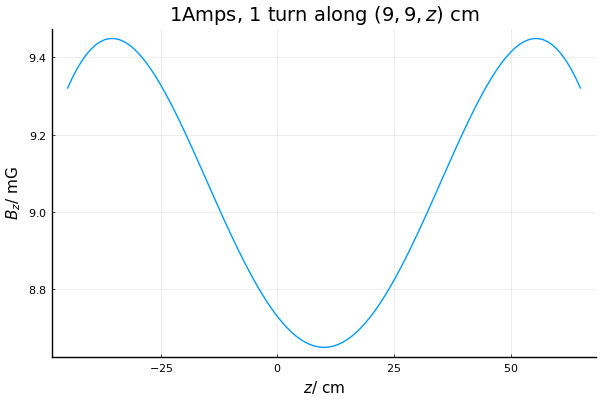

In [4]:
zlist=range(0.0,1.1,step=0.01)
plot(zlist*100 .-45,Bztot.(0.09,0.09,zlist).*10^7,label="")

title!(L"1Amps, 1 turn along $(9,9,z)$ cm")
xlabel!(L"$z$/ cm")
ylabel!(L"$B_z$/ mG")


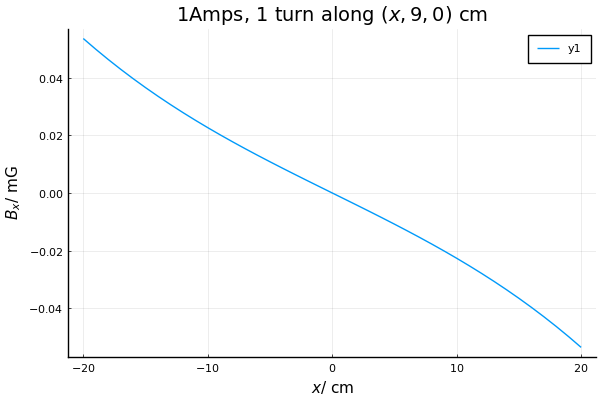

In [5]:
xlist=range(-0.2,0.2,step=0.01)
plot(xlist.*100,Bxtot.(xlist,0.09,0.58).*10^7)

title!(L"1Amps, 1 turn along $(x,9,0)$ cm")
xlabel!(L"$x$/ cm")
ylabel!(L"$B_x$/ mG")

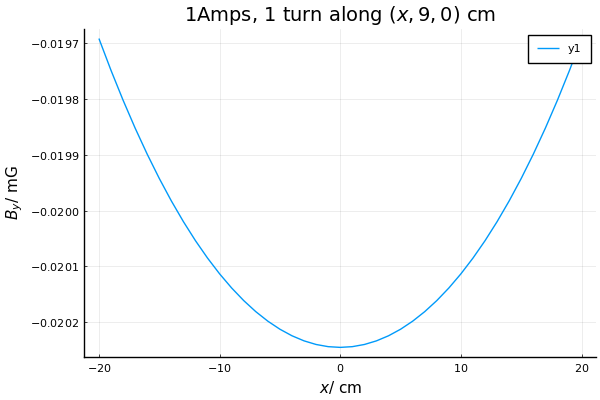

In [6]:
ylist=range(-0.2,0.2,step=0.01)
plot(ylist.*100,Bxtot.(0.09,ylist,0.58).*10^7)


title!(L"1Amps, 1 turn along $(x,9,0)$ cm")
xlabel!(L"$x$/ cm")
ylabel!(L"$B_y$/ mG")

In [7]:
println(Bztot(0,0,0.45)*10^7)
println(Bxtot(0,0,0.45)*10^7)
println(Bytot(0,0,0.45)*10^7)

println(Bztot(0.09,0.09,0.45+0.13)*10^7)
println(Bxtot(0.09,0.09,0.45+0.13)*10^7)
println(Bytot(0.09,0.09,0.45+0.13)*10^7)

8.777940301384817
0.0
9.714451465470121e-17
8.656380050687128
-0.02013852049166027
-0.02013852049166027


## Conclusion

In the end, when we ramp up 1 amp current in 1 coil turn, it will produce (0, 0 ,8.77) mG at the atom cloud and (-0.02, -0.02, 8.66) mG at the sensor.

The homogeneity is good enough. But if only one coil is used, it is not very homogeneous.

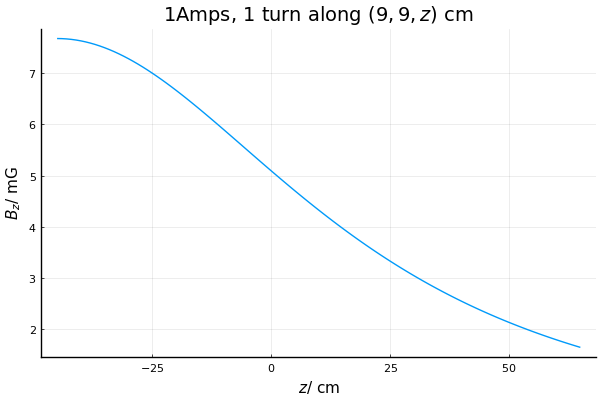

In [8]:
zlist=range(0.0,1.1,step=0.01)
plot(zlist*100 .-45,Bz.(0.09,0.09,zlist).*10^7,label="")

title!(L"1Amps, 1 turn along $(9,9,z)$ cm")
xlabel!(L"$z$/ cm")
ylabel!(L"$B_z$/ mG")